# How to apply TICOI on one pixel of NetCDF cube ?

For this demonstration we are going to use the test data available on the git repository.
But you can modify it to use your one dataset!

In [7]:
import os
from ticoi.core import ticoi_one_pixel

#### 1) Here are the demo specific variables that you should modify for your one dataset:

In [8]:
cube_name = f'{os.path.abspath(os.path.join(os.getcwd(), "..","..","..", "test_data"))}/ITS_LIVE_Lowell_Lower_test.nc'# path to our dataset
path_save = f'{os.path.abspath(os.path.join(os.getcwd(), "..","..", "results", "pixel"))}/'# path where to save our results
# i, j = -138.15069, 60.27076# coordinate of the pixel
i, j = -138.16069, 60.28076# coordinate of the pixel

pick_dates = ["2015-01-01", "2024-01-01"]# date range to study

In [9]:
print(path_save)

/home/charriel/Documents/Scripts_dossier/ticoi_lch/examples/results/pixel/


#### 2) Then, let's define the main TICOI parameters

- Processing parameters

In [10]:
coef = 100  # Regularization coefficient to be used
delete_outliers = {"median_angle": 45} #Remove the observation if its direction is 45° away from the direction of the median vector
# delete_outliers = None

- Visualization parameters


In [11]:
save = True  # Save the results and figures
show = True  # Plot some figures
option_visual = ["obs_magnitude", "invertvv","inverpvv", "quality_metrics"] #check README_visualization_pixel_output to see the different options .
result_quality = [

    "X_contribution",
]  # Criterium used to evaluate the quality of the results: ("Error_propagation": the initial error given in the dataset is propagated through the inversion; "X_contribution" correspond to the number of observed velocity used to estimate each estimated value

#### 4) To finish, we just have to run ticoi on our pixel!

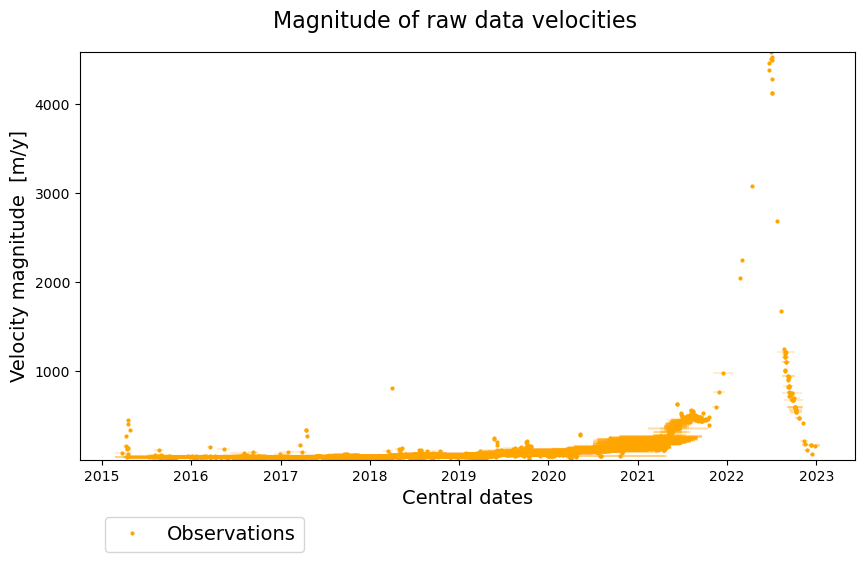

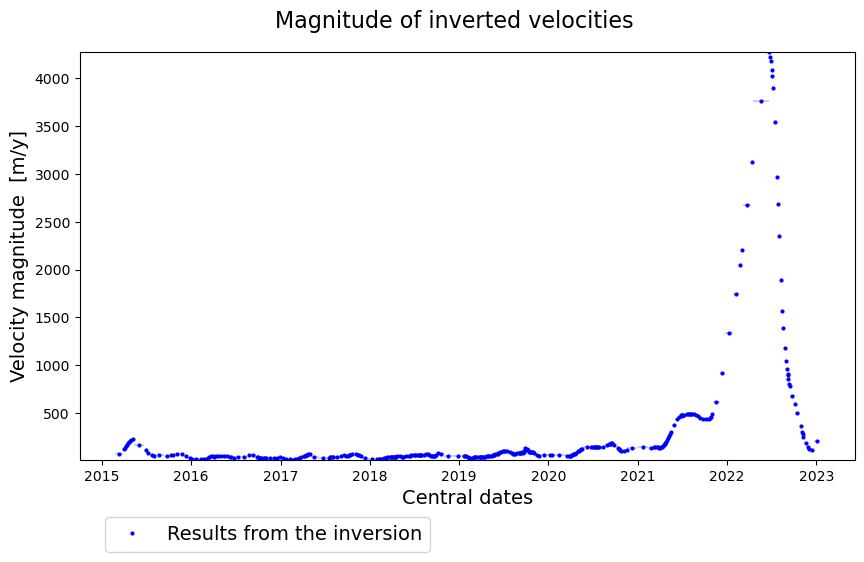

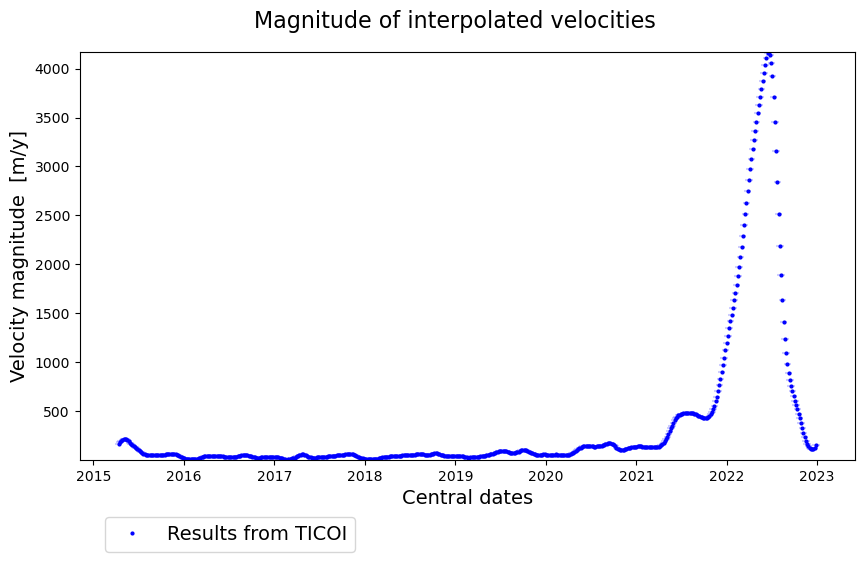

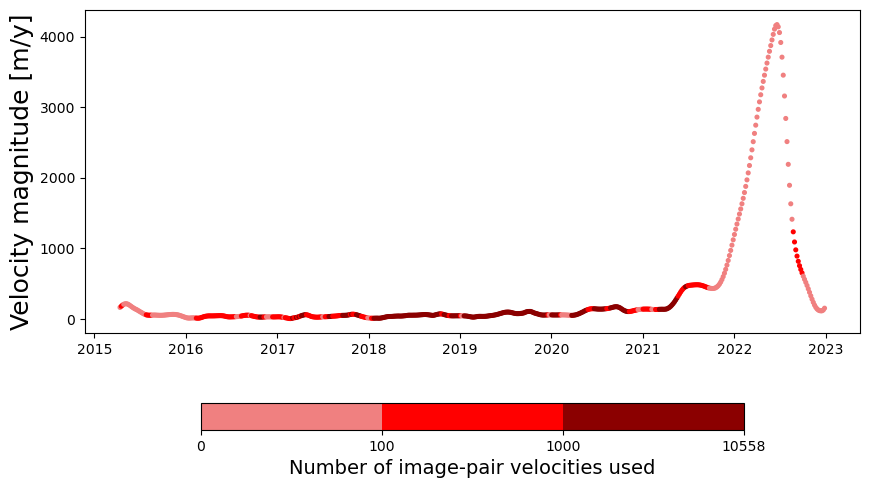

In [12]:
data,dataf,dataf_lp = ticoi_one_pixel(cube_name=cube_name,i=i,j=j,save=save,path_save=path_save,show=show,option_visual=option_visual,load_kwargs={"pick_date":pick_dates,"buffer": [i, j, 0.01]},load_pixel_kwargs={"visual":show},preData_kwargs={"delete_outliers":delete_outliers},inversion_kwargs = {"coef":coef,"result_quality":result_quality,"visual":show},interpolation_kwargs = {"result_quality":result_quality})

#### To go further

If you want to see to the main function beyond ticoi_one_pixel, and understand a bit more the other possible parameters, you can check our pixel_ticoi_demo.py (examples > basic > python_script)